<a href="https://colab.research.google.com/github/jisoolee11/Deep-Learning/blob/main/DeepLearning%20for%20everyone/predicting_the_type_of_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [28]:
# 데이터 입력
df_pre = pd.read_csv('wine.csv', header = None)
df = df_pre.sample(frac = 1)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [29]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [30]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [32]:
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [33]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_boss', patience=100)

In [ ]:
# 모델 실행
history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer])
# 결과 출력
# print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

In [38]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [39]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

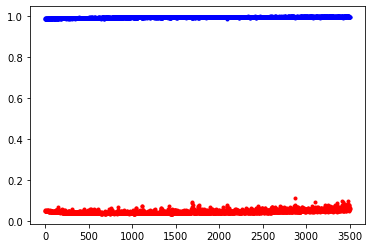

In [40]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()